```
Nama    : Roziq Mahbubi
Kelas   : TI-3F/27
NIM     : 2141720086
Subjek  : Kuis 1 Mata Kuliah Machine Learning
```

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [2]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Nomor 1

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan dan buktikan!

In [5]:
import pandas as pd

print(mnist.data)
print(mnist.target)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [6]:
data = pd.DataFrame(mnist.data, columns=mnist.feature_names)
target = pd.Series(mnist.target, name='target')

df = pd.concat([data, target], axis=1)

print(df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.

In [7]:
import numpy as np

jumlah_data = df['target'].value_counts()
print(jumlah_data)
print(np.mean(jumlah_data))
print(np.median(jumlah_data))

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64
7000.0
6930.5


pada dataset yang diberikan, ada sedikit data imbalance namun tidak terlalu signifikan. Karena selisih dari data mayoritas dan data minoritas tidak terlalu jauh jika dibandingkan dengan jumlah data dan rata-rata data pada tiap label.

### Nomor 2
Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

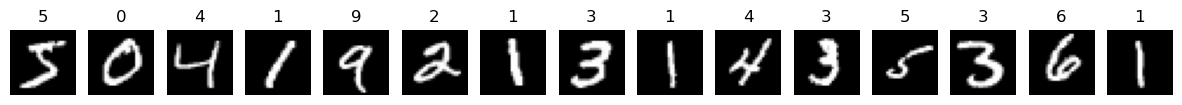

In [8]:
import matplotlib.pyplot as plt

data_array = mnist.data.to_numpy()
gambar = data_array[0:15]
label = df['target'][0:15]

fig, ax = plt.subplots(1, 15, figsize=(15, 1))
for i in range(15):
    gambar_i = gambar[i].reshape(28,28)
    ax[i].imshow(gambar_i, cmap='gray')
    ax[i].set_title(label[i])
    ax[i].axis('off')

plt.show()


### Nomor 3
Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [9]:
fitur = pd.DataFrame(mnist.data, columns=mnist.feature_names)
label = pd.Series(mnist.target, name='target')

### Nomor 4
Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [10]:
from sklearn.model_selection import train_test_split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(fitur, label, train_size = 0.7, test_size = 0.3, random_state = 100)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(fitur, label, train_size = 0.8, test_size = 0.2, random_state = 100)
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(fitur, label, train_size = 0.9, test_size = 0.1, random_state = 100)

### Nomor 5
Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

#### Model SVM

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
pca = RandomizedPCA(n_components=120, whiten=True, random_state=70)
svc = svm.SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

param_grid = {'svc__C': [0.1, 0.5, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} 
xtrain_subset = xtrain1.iloc[:1000]
ytrain_subset = ytrain1.iloc[:1000]

grid = GridSearchCV(model, param_grid)
grid.fit(xtrain_subset, ytrain_subset)

%time grid.fit(xtrain_subset, ytrain_subset)
print(grid.best_params_)
print(grid.best_score_)

# hasil terbaik sejauh ini adalah dengan menggunakan 120 komponen fitur dengan 70 random state pada reduksi dimensi data menggunakan pca

CPU times: total: 8.14 s
Wall time: 19.2 s
{'svc__C': 5, 'svc__gamma': 0.005}
0.8800000000000001


In [26]:
model1 = grid.best_estimator_
model2 = grid.best_estimator_
model3 = grid.best_estimator_

model1.fit(xtrain1, ytrain1)
model2.fit(xtrain2, ytrain2)
model3.fit(xtrain3, ytrain3)

Pipeline(steps=[('pca', PCA(n_components=120, random_state=70, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])

In [30]:
yPredTrain1 = model1.predict(xtrain1)
yPredTrain2 = model2.predict(xtrain2)
yPredTrain3 = model3.predict(xtrain3)

yfit1 = model1.predict(xtest1)
yfit2 = model2.predict(xtest2)
yfit3 = model3.predict(xtest3)

#### Model Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

modelNB1 = make_pipeline(pca, gnb)
modelNB2 = make_pipeline(pca, gnb)
modelNB3 = make_pipeline(pca, gnb)

modelNB1.fit(xtrain1, ytrain1)
modelNB2.fit(xtrain2, ytrain2)
modelNB3.fit(xtrain3, ytrain3)

yPredTrainNB1 = modelNB1.predict(xtrain1)
yPredTrainNB2 = modelNB2.predict(xtrain2)
yPredTrainNB3 = modelNB3.predict(xtrain3)

yfitNB1 = modelNB1.predict(xtest1)
yfitNB2 = modelNB2.predict(xtest2)
yfitNB3 = modelNB3.predict(xtest3)

### Nomor 6
6. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
import seaborn as sns

#### Model SVM

##### Accuracy Score

In [33]:
accTrainSVM1 = accuracy_score(ytrain1, yPredTrain1)
accTrainSVM2 = accuracy_score(ytrain2, yPredTrain2)
accTrainSVM3 = accuracy_score(ytrain3, yPredTrain3)

accTestSVM1 = accuracy_score(ytest1, yfit1)
accTestSVM2 = accuracy_score(ytest2, yfit2)
accTestSVM3 = accuracy_score(ytest3, yfit3)

print(f'Hasil akurasi data train rasio 7:3= {accTrainSVM1}')
print(f'Hasil akurasi data train rasio 8:2= {accTrainSVM2}')
print(f'Hasil akurasi data train rasio 9:1= {accTrainSVM3}\n')
print(f'Hasil akurasi data test rasio 7:3= {accTestSVM1}')
print(f'Hasil akurasi data test rasio 8:2= {accTestSVM2}')
print(f'Hasil akurasi data test rasio 9:1= {accTestSVM3}')

Hasil akurasi data train rasio 7:3= 0.9994285714285714
Hasil akurasi data train rasio 8:2= 0.9994285714285714
Hasil akurasi data train rasio 9:1= 0.9994285714285714

Hasil akurasi data test rasio 7:3= 0.9944285714285714
Hasil akurasi data test rasio 8:2= 0.9919285714285714
Hasil akurasi data test rasio 9:1= 0.9844285714285714


##### Classification Report

In [42]:
print('classification report 1')
print(classification_report(ytest1, yfit1))

classification report 1
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2035
           1       1.00      1.00      1.00      2379
           2       0.99      0.99      0.99      2104
           3       0.99      0.99      0.99      2193
           4       0.99      0.99      0.99      2104
           5       0.99      0.99      0.99      1860
           6       1.00      1.00      1.00      2094
           7       0.99      0.99      0.99      2155
           8       0.99      1.00      1.00      2004
           9       1.00      0.99      0.99      2072

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99      0.99     21000



In [43]:
print('classification report 2')
print(classification_report(ytest2, yfit2))

classification report 2
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.99      1.00      1.00      1587
           2       0.99      0.99      0.99      1420
           3       0.99      0.99      0.99      1492
           4       0.99      0.99      0.99      1390
           5       0.99      0.99      0.99      1239
           6       0.99      1.00      0.99      1373
           7       0.99      0.99      0.99      1412
           8       0.99      0.99      0.99      1323
           9       0.99      0.99      0.99      1408

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [44]:
print('classification report 3')
print(classification_report(ytest3, yfit3))

classification report 3
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       701
           1       0.99      0.99      0.99       792
           2       0.98      0.98      0.98       713
           3       0.98      0.98      0.98       715
           4       0.98      0.98      0.98       698
           5       0.99      0.98      0.98       630
           6       0.99      0.99      0.99       690
           7       0.98      0.98      0.98       724
           8       0.98      0.99      0.99       639
           9       0.99      0.97      0.98       698

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000



##### Confussion Matrix

Confussion Matrix 1 :



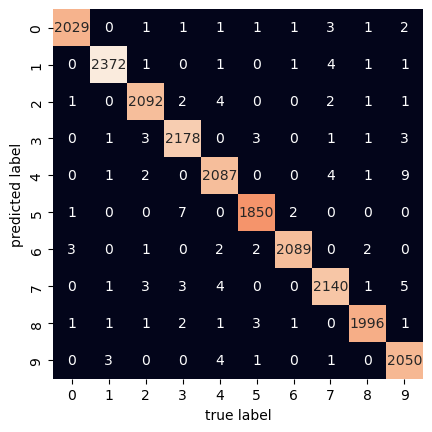

In [49]:
print('Confussion Matrix 1 :\n')
mat = confusion_matrix(ytest1, yfit1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 2 :



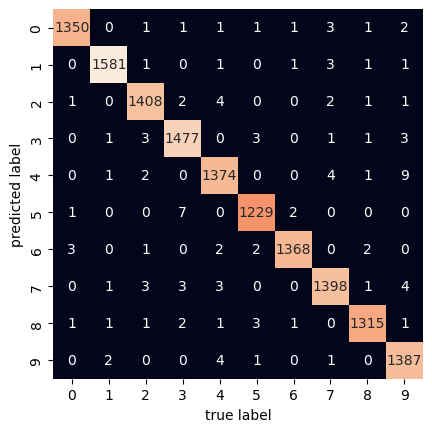

In [50]:
print('Confussion Matrix 2 :\n')
mat = confusion_matrix(ytest2, yfit2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 3 :



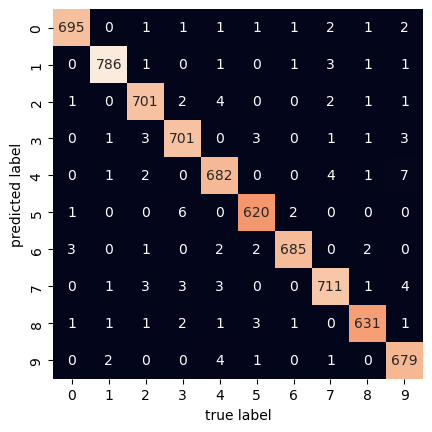

In [51]:
print('Confussion Matrix 3 :\n')
mat = confusion_matrix(ytest3, yfit3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### Model Naive Bayes

##### Accuracy Score

In [53]:
accTrainNB1 = accuracy_score(ytrain1, yPredTrainNB1)
accTrainNB2 = accuracy_score(ytrain2, yPredTrainNB2)
accTrainNB3 = accuracy_score(ytrain3, yPredTrainNB3)

accTestNB1 = accuracy_score(ytest1, yfitNB1)
accTestNB2 = accuracy_score(ytest2, yfitNB2)
accTestNB3 = accuracy_score(ytest3, yfitNB3)

print(f'Hasil akurasi data train rasio 7:3= {accTrainNB1}')
print(f'Hasil akurasi data train rasio 8:2= {accTrainNB2}')
print(f'Hasil akurasi data train rasio 9:1= {accTrainNB3}\n')
print(f'Hasil akurasi data test rasio 7:3= {accTestNB1}')
print(f'Hasil akurasi data test rasio 8:2= {accTestNB2}')
print(f'Hasil akurasi data test rasio 9:1= {accTestNB3}')

Hasil akurasi data train rasio 7:3= 0.8639591836734694
Hasil akurasi data train rasio 8:2= 0.864375
Hasil akurasi data train rasio 9:1= 0.8646031746031746

Hasil akurasi data test rasio 7:3= 0.8676190476190476
Hasil akurasi data test rasio 8:2= 0.8677857142857143
Hasil akurasi data test rasio 9:1= 0.8691428571428571


##### Classification Report

In [54]:
print('classification report 1')
print(classification_report(ytest1, yfitNB1))

classification report 1
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2035
           1       0.98      0.95      0.97      2379
           2       0.72      0.86      0.78      2104
           3       0.83      0.83      0.83      2193
           4       0.90      0.84      0.87      2104
           5       0.79      0.83      0.81      1860
           6       0.93      0.90      0.92      2094
           7       0.93      0.85      0.89      2155
           8       0.84      0.86      0.85      2004
           9       0.83      0.82      0.83      2072

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [55]:
print('classification report 2')
print(classification_report(ytest2, yfitNB2))

classification report 2
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1356
           1       0.98      0.95      0.97      1587
           2       0.73      0.86      0.79      1420
           3       0.83      0.84      0.83      1492
           4       0.89      0.83      0.86      1390
           5       0.79      0.83      0.81      1239
           6       0.93      0.90      0.92      1373
           7       0.92      0.85      0.89      1412
           8       0.84      0.87      0.85      1323
           9       0.84      0.82      0.83      1408

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



In [56]:
print('classification report 3')
print(classification_report(ytest3, yfitNB3))

classification report 3
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       701
           1       0.98      0.95      0.96       792
           2       0.73      0.87      0.80       713
           3       0.83      0.84      0.83       715
           4       0.89      0.83      0.86       698
           5       0.80      0.82      0.81       630
           6       0.93      0.89      0.91       690
           7       0.92      0.85      0.89       724
           8       0.83      0.87      0.85       639
           9       0.83      0.83      0.83       698

    accuracy                           0.87      7000
   macro avg       0.87      0.87      0.87      7000
weighted avg       0.87      0.87      0.87      7000



##### Confussion Matrix

Confussion Matrix 1 :



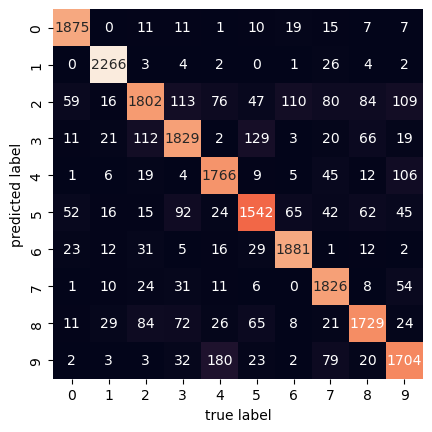

In [57]:
print('Confussion Matrix 1 :\n')
mat = confusion_matrix(ytest1, yfitNB1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 2 :



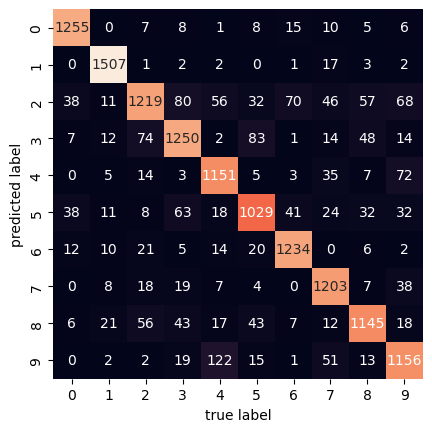

In [58]:
print('Confussion Matrix 2 :\n')
mat = confusion_matrix(ytest2, yfitNB2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Confussion Matrix 3 :



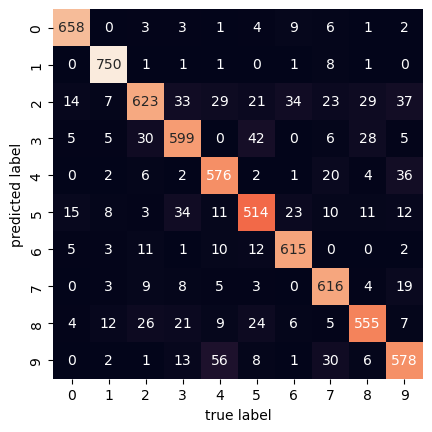

In [59]:
print('Confussion Matrix 3 :\n')
mat = confusion_matrix(ytest3, yfitNB3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Nomor 7
7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

#### Model SVM

##### Rasio 7:3

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

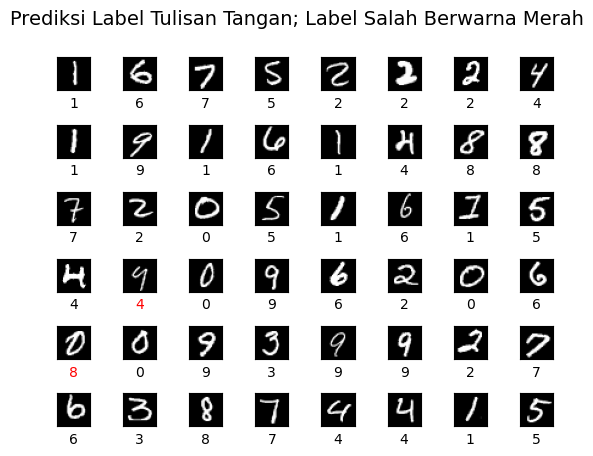

In [85]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest1.iloc[i+200].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfit1[i+200], color='black' if yfit1[i+200] == ytest1.iloc[i+200] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

##### Rasio 8:2

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

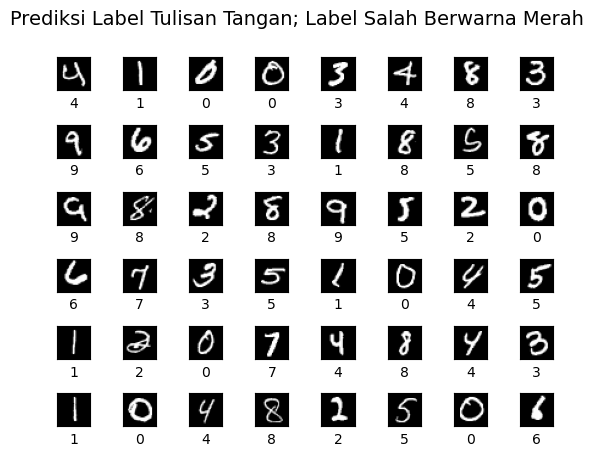

In [89]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2.iloc[i+900].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfit2[i+900], color='black' if yfit2[i+900] == ytest2.iloc[i+900] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

##### Rasio 9:1

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

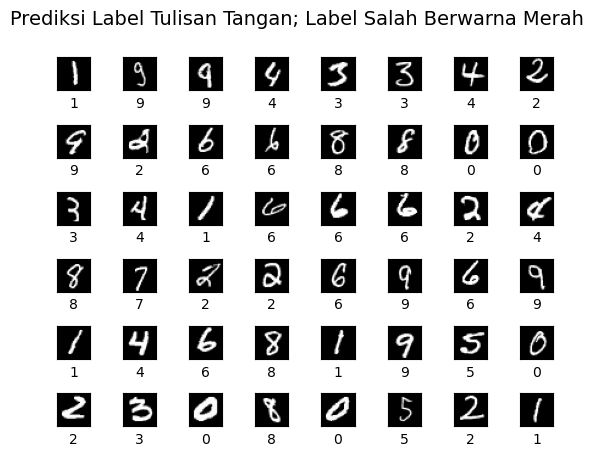

In [90]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest3.iloc[i+4500].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfit3[i+4500], color='black' if yfit3[i+4500] == ytest3.iloc[i+4500] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

### Model Naive Bayes

##### Rasio 7:3

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

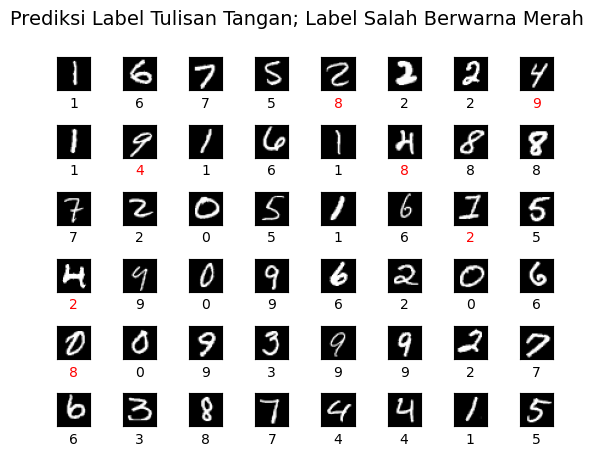

In [91]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest1.iloc[i+200].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfitNB1[i+200], color='black' if yfitNB1[i+200] == ytest1.iloc[i+200] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

##### Rasio 8:2

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

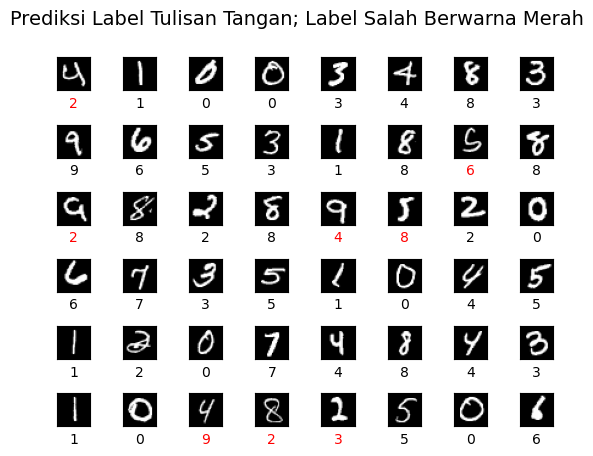

In [92]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2.iloc[i+900].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfitNB2[i+900], color='black' if yfitNB2[i+900] == ytest2.iloc[i+900] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

##### Rasio 9:1

Text(0.5, 0.98, 'Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah')

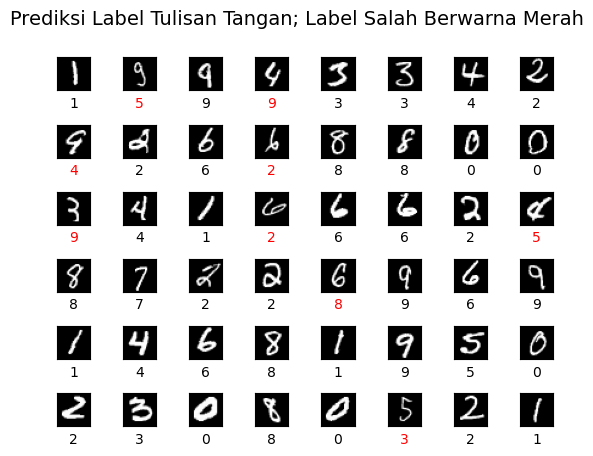

In [93]:
fig, ax = plt.subplots(6, 8)
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest3.iloc[i+4500].values.reshape(28, 28), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(yfitNB3[i+4500], color='black' if yfitNB3[i+4500] == ytest3.iloc[i+4500] else 'red')
fig.subplots_adjust(wspace=1, hspace=1)
fig.suptitle('Prediksi Label Tulisan Tangan; Label Salah Berwarna Merah', size=14)

### Nomor 8
Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

Model yang terbaik yang saya temukan setelah melakukan percobaan klasifikasi data MNIST adalah model SVM. Terlihat jelas pada perbandingan hasil prediksi pada nomor 7, bahwa hasil prediksi model Naive Bayes memiliki lebih banyak hasil yang salah dibandingkan hasil prediksi model SVM. Juga bisa dilihat pada classification report pada nomor 6, bahwa model SVM memiliki skor yang lebih tinggi dibandingkan dengan model Naive Bayes. Pada classification report juga terlihat bahwa pembagian data training dengan data testing yang menggunakan rasio 7:3 menghasilkan prediksi yang lebih akurat dibandingkan dengan rasio 8:2 dan 9:1. Pada proses klasifikasi menggunakan model SVM, digunakan parameter c=5 dan gamma=0.005 sesuai dengan hasil gridSearch yang menghasilkan poin tertinggi sebesar 0.8800000000000001. Pada proses klasifikasi juga digunakan PCA untuk mereduksi dimensi data agar dapat mempercepat proses klasifikasi data yang juga melakukan standardisasi data MNIST yang semula memiliki nilai 0-255 menjadi data warna biner(whiten=true).